Iantsa Provost et Bastien Soucasse – Groupe 5

# Projet d’ACID – 2 janvier 2022

[Sujet](https://masterinfo.emi.u-bordeaux.fr/wiki/lib/exe/fetch.php?media=mini_projet.pdf)

## Introduction

Afin de se lancer dans la comparaison des différents algorithmes de _Machine Learning_, il nous faut des données à exploiter pour l’entraînement et en guise de test.

Commençons par importer les modules nécessaires au bon fonctionnement du projet.

In [56]:
from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

VERBOSE = True

On peut alors créer nos données à l’aide de **keras**.

In [66]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

assert len(X_train.shape) == 3
assert len(X_test.shape) == 3
assert len(y_train.shape) == 1
assert len(y_test.shape) == 1

if (VERBOSE):
    print('X_train.shape =', X_train.shape)
    print('y_train.shape =', y_train.shape)
    print('X_test.shape =', X_test.shape)
    print('y_test.shape =', y_test.shape)

X_train.shape = (60000, 28, 28)
y_train.shape = (60000,)
X_test.shape = (10000, 28, 28)
y_test.shape = (10000,)


Si besoin, on peut avoir un aperçu des données.

In [ ]:
if VERBOSE:
    NUM_EXAMPLES = 5

    for i in range(NUM_EXAMPLES):
        print('X_train[%d]:' % i)
        plt.imshow(X_train[i], cmap = cm.Greys)
        plt.show()
        print('y_train[%d] =' % i, y_train[i])

On a également besoin d’applatir les données.

In [67]:
X_train, X_test = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2]), X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

assert len(X_train.shape) == 2
assert len(X_test.shape) == 2

if (VERBOSE):
    print('X_train.shape =', X_train.shape)
    print('X_test.shape =', X_test.shape)

X_train.shape = (60000, 784)
X_test.shape = (10000, 784)


## Classifications des données

Cette partie est dédiée concrètement au _Machine Learning_. Pour classifier les données on a plusieurs méthodes que l’on peut appliquer.

- Méthode des `k` plus proches voisins
- Classification naïve bayésienne
- Analyse discriminante linéaire
- Perceptron multicouche [?]

### Méthode des `k` plus proches voisins

Commençons par importer la classe du modèle de la classification par la méthode des `k` plus proches voisins.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

On définit ensuite les valeurs possibles pour `k`.

In [6]:
K_VALS = list(range(1, 11)) + list(range(11, 101, 20))

if VERBOSE:
    print('K_VALS =', K_VALS)

K_VALS = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 31, 51, 71, 91]


On peut calculer la précision `accuracy` pour chaque `k`.

In [7]:
knn_accuracies = {}

for k in K_VALS:
    if VERBOSE:
        print('Computing %d-Nearest Neighbors classification…' % k)

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_accuracies[k] = knn.score(X_test, y_test)

    if VERBOSE:
        print('accuracy =', knn_accuracies.get(k))

Computing 1-Nearest Neighbors classification…
accuracy = 0.8497
Computing 2-Nearest Neighbors classification…
accuracy = 0.846
Computing 3-Nearest Neighbors classification…
accuracy = 0.8541
Computing 4-Nearest Neighbors classification…
accuracy = 0.8577
Computing 5-Nearest Neighbors classification…
accuracy = 0.8554
Computing 6-Nearest Neighbors classification…
accuracy = 0.8544
Computing 7-Nearest Neighbors classification…
accuracy = 0.854
Computing 8-Nearest Neighbors classification…
accuracy = 0.8534
Computing 9-Nearest Neighbors classification…
accuracy = 0.8519
Computing 10-Nearest Neighbors classification…
accuracy = 0.8515
Computing 11-Nearest Neighbors classification…
accuracy = 0.8495
Computing 31-Nearest Neighbors classification…


KeyboardInterrupt: 

On récupère ainsi la précision du meilleur modèle de classification par la méthode des `k` plus proches voisins.

In [8]:
best_k = max(knn_accuracies, key=knn_accuracies.get)

print('%d-Nearest Neighbors:' % best_k)
print('  - Mean accuracy: %.2f%%.' % (knn_accuracies.get(best_k) * 100))

4-Nearest Neighbors:
  - Mean accuracy: 85.77%.


On remarque alors que le meilleur modèle de classification par la méthode des `k` plus proches voisins est celui dont le `k` est égal à 4 et sa précision est de 86%. Quant aux autres valeurs de `k`, on constate malgré tout qu’on arrive généralement au delà des 80% de précision.

### Classification naïve bayésienne

Commençons par importer la classe du modèle de la classification naïve bayésienne.

In [9]:
from sklearn.naive_bayes import GaussianNB

On peut calculer la précision `accuracy`.

In [10]:
if VERBOSE:
    print('Computing gaussian naive Bayes classification…')

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_accuracy = gnb.score(X_test, y_test)

if VERBOSE:
    print('accuracy =', gnb_accuracy)

Computing gaussian naive Bayes classification…
accuracy = 0.5856


On récupère ainsi la précision de la classification naïve bayésienne.

In [11]:
print('Gaussian Naive Bayes:')
print('  - Mean accuracy: %.2f%%.' % (gnb_accuracy * 100))

Gaussian Naive Bayes:
  - Mean accuracy: 58.56%.


On remarque alors que la classification naïve bayésienne a une précision de 59%.

### Analyse discriminante linéaire

Commençons par importer la classe du modèle de la classification par l’analyse discriminante linéaire.

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

On peut calculer la précision `accuracy`.

In [13]:
if VERBOSE:
    print('Computing linear discriminant analysis classification…')

lda = LDA()
lda.fit(X_train, y_train)
lda_accuracy = lda.score(X_test, y_test)

if VERBOSE:
    print('accuracy =', lda_accuracy)

Computing linear discriminant analysis classification…
accuracy = 0.8151


On récupère ainsi la précision de la classification par l’analyse discriminante linéaire.

In [14]:
print('Linear Discriminant Analysis:')
print('  - Mean accuracy: %.2f%%.' % (lda_accuracy * 100))

Linear Discriminant Analysis:
  - Mean accuracy: 81.51%.


On remarque alors que la classification par l’analyse discriminante linéaire a une précision de 82%.

## Avec Analyse en Composantes Principales

Nous allons maintenant effectuer une ACP en amont, afin de ta race.

In [83]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = np.concatenate((X_train, X_test))
z = scaler.fit_transform(X)

In [84]:
from sklearn.decomposition import PCA
acp = PCA()
print(acp)

PCA()


In [85]:
coord = acp.fit_transform(z)
print(acp.n_components_)

784


Utilisons le critère du coude pour définir le nombre d'axes que l'on va retenir. Pour ce faire, nous allons construire l'éboulis.

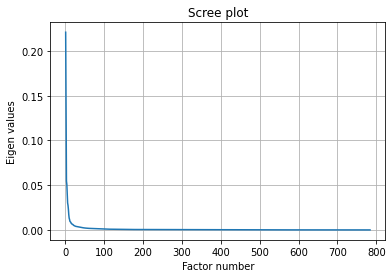

In [86]:
import numpy as np

def display_scree_plot(n_components, explained_variance_ratio):
    plt.grid()
    plt.plot(np.arange(1, n_components+1), explained_variance_ratio)
    plt.title("Scree plot")
    plt.ylabel("Eigen values")
    plt.xlabel("Factor number")
    plt.show()

display_scree_plot(acp.n_components_, acp.explained_variance_ratio_)

En l'état, l'éboulis n'est pas vraiment lisible. Cependant, on remarque qu'à partir d'un certain facteur, la valeur propre est plutôt constante. On peut donc tronquer cette partie, ce qui nous permettra de "zoomer" sur le décrochement qu'on cherche.

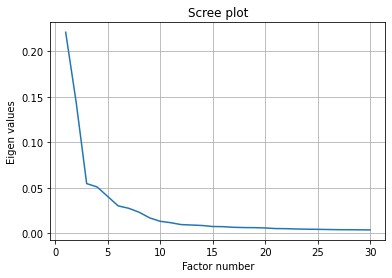

In [87]:
display_scree_plot(30, acp.explained_variance_ratio_[:30])

Le décrochement semble se faire pour 3 ou 4 axes. Observons la variance totale pour ces 2 possibilités :

In [88]:
p = 5
acp = PCA(n_components=p)
coord = acp.fit_transform(z)
print(acp.explained_variance_ratio_.sum())

0.5110342126751333


On a dû prendre 5 axes afin de garder au moins 50% de la variance, ce qui reste assez peu...

### Classification bayésienne

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from time import time

nb = GaussianNB()
X = np.concatenate((X_train, X_test))
z = scaler.fit_transform(X)
p = 5
acp = PCA(n_components=p)
Xp = acp.fit_transform(z)
Xp_train = Xp[:60000]
Xp_test = Xp[60000:]
t = time()
nb.fit(Xp_train, y_train)
t = time() - t
y_pred = nb.predict(Xp_test)
acc = accuracy_score(y_test, y_pred)
print('time: ', t)
print('accuracy: ', acc)

time:  0.03129172325134277
accuracy:  0.6263


## Conclusion

À partir des précisions calculés dans la partie précédente, il est possible de déterminer quelles sont les meilleures pour ces données.

On peut trier toutes les précisions par ordre décroissant.

In [15]:
accuracies = {
    '%d-Nearest Neighbors' % best_k: knn_accuracies.get(best_k),
    'Gaussian Naive Bayes': gnb_accuracy,
    'Linear Discriminant Analysis': lda_accuracy
}

accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1], reverse=True))

if VERBOSE:
    print(accuracies)

{'4-Nearest Neighbors': 0.8577, 'Linear Discriminant Analysis': 0.8151, 'Gaussian Naive Bayes': 0.5856}


On peut alors déterminer quels sont les meilleurs modèles de classification.

In [16]:
print('Best Models:')

i = 0

for model in accuracies:
    i += 1
    print('  #%d: %s (with %.2f%%).' % (i, model, accuracies.get(model) * 100))

Best Models:
  #1: 4-Nearest Neighbors (with 85.77%).
  #2: Linear Discriminant Analysis (with 81.51%).
  #3: Gaussian Naive Bayes (with 58.56%).


On constate donc que la classification par la méthode des 4 plus proches voisins a été la plus efficace, suivi par celle par l’analyse discriminante linéaire, et enfin la classification naïve bayésienne qui fût la moins efficace sur ces données.

Bon tout ça c’est probablement encore approximatif mais j’ai tenté de prendre un peu d’avance en faisant ce que je pouvais en amont. 🙂